<a href="https://colab.research.google.com/github/Jeetanand/Text-Classification/blob/main/tfidf_mltNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

df = pd.read_csv('preprocessed_data.csv')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38050 entries, 0 to 38049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    38050 non-null  int64  
 1   clean_text    38050 non-null  object 
 2   category      38050 non-null  float64
 3   Length        38050 non-null  float64
 4   Preprocessed  38050 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ MB


In [26]:
df.isnull().sum()

Unnamed: 0      0
clean_text      0
category        0
Length          0
Preprocessed    0
dtype: int64

<Axes: xlabel='category', ylabel='count'>

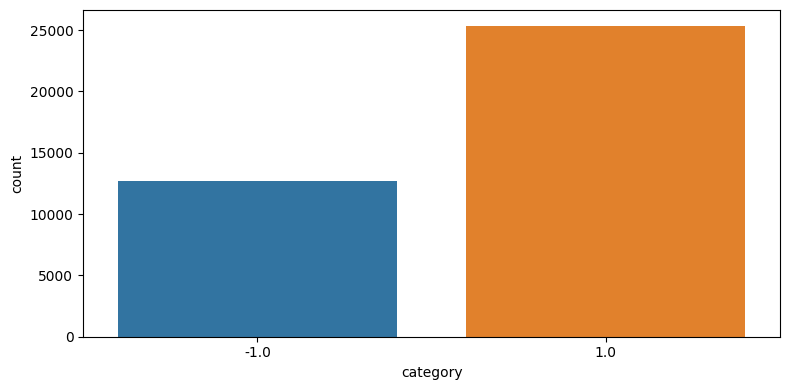

In [29]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=df, x='category', ax=ax)

In [22]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Preprocessed'], df['category'], test_size = 0.3, random_state = 42)

In [23]:
# Multinomial NB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('MNB', MultinomialNB(alpha=0.1))
])

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

        -1.0       0.79      0.45      0.57      3832
         1.0       0.77      0.94      0.85      7583

    accuracy                           0.77     11415
   macro avg       0.78      0.69      0.71     11415
weighted avg       0.78      0.77      0.75     11415

